#AlexNet

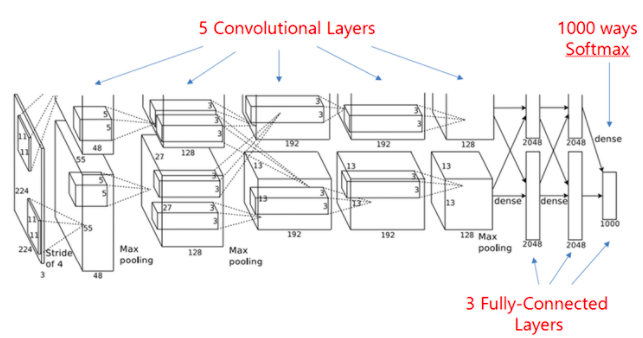

###AlexNet의 구조

[227x227x3] Input Layer

[55x55x96] conv1 : 96 Channels, 11x11 Filters, Stride=4, Padding=0

[27x27x96] MaxPool1 : 3x3 Filters, Stride=2

[27x27x96] Norm1 : Normalization(LRN)

[27x27x256] Conv2 : 256 Channels, 3x3 Filters, Stride=1, Padding=2

[13x13x256] MaxPool2 : 3x3 Filters, Stride=2

[13x13x256] Norm2 : Normalization(LRN)

[13x13x384] Conv3 : 384 Channels, 3x3 Filters, Stride=1, Padding=1

[13x13x384] Conv4 : 384 Channels, 3x3 Filters, Stride=1, Padding=1

[13x13x256] Conv5 : 256 Channels, 3x3 Filters, Stride=1, Padding=1

[6x6x256] MaxPool3 : 3x3 Filters, Stride=2

[4096] Fully-Connected1 : 4096 Neurons

[4096] Fully-Connected2 : 4096 Neurons

[1000] Output Layer : 1000 Neurons(Class Scores)

- Relu 함수 사용 
- 1, 2번째 convolution layer에 LRN, Local Response Normalization 사용
- maxpooling시 3x3 영역을 2픽셀 단위로 pooling해 일부러 겹치게 함 ->overfitting 개선

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [4]:
#alexnet 모델
model = tf.keras.Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), kernel_size=(11,11), filters=96, strides=4, padding='valid', activation='relu')) 
model.add(MaxPooling2D(pool_size=3, strides=2)) 
model.add(BatchNormalization()) #LRN 대신 사용
model.add(Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(BatchNormalization()) 
model.add(Conv2D(kernel_size=(3, 3), filters=384, padding='same', activation='relu')) 
model.add(Conv2D(kernel_size=(3, 3), filters=384, padding='same', activation='relu')) 
model.add(Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu')) 
model.add(MaxPooling2D(pool_size=3, strides=2))
model.add(Flatten()) #1차원 배열로 전환
model.add(Dense(4096, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(17, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       221440    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 13, 13, 256)       1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)      